## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

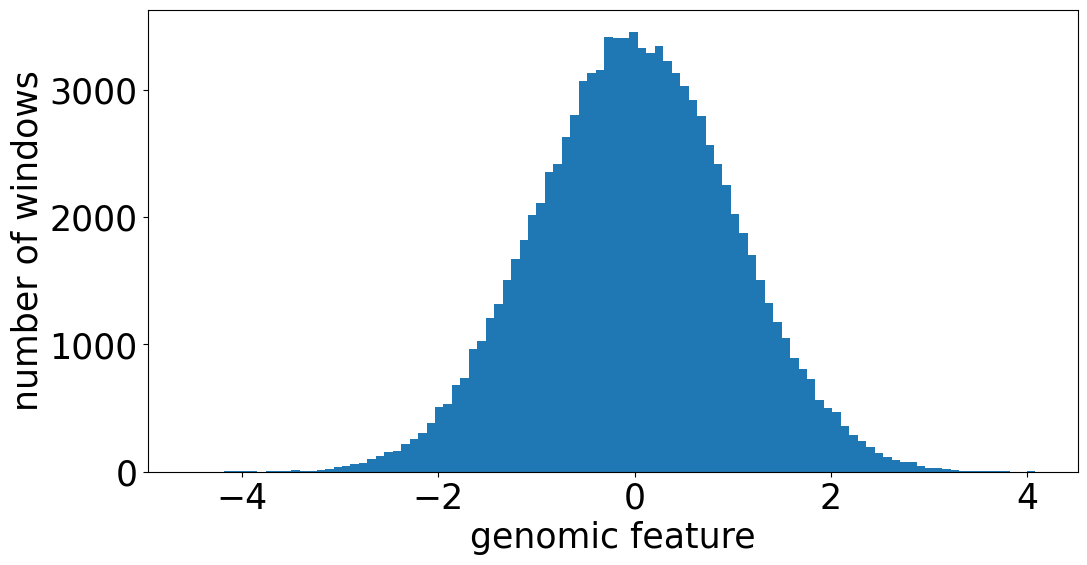

In [1]:
import matplotlib.pyplot as plt

from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 100000 # Number of intervals

plot_xs(NUMBER_EXAMPLES)

## True mapping from feature to target (mimicking SNV counts)

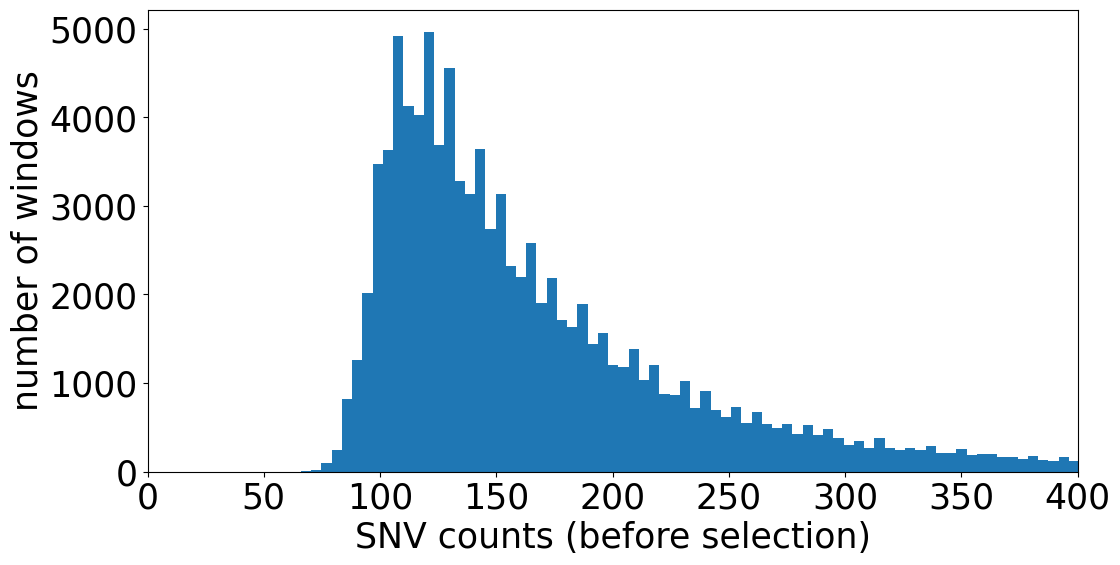

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,2.216228,581,True
1,0.332420,145,True
2,-1.074199,96,True
3,0.919696,226,True
4,0.269298,172,True
...,...,...,...
99995,-0.759186,125,False
99996,-0.922945,102,False
99997,-0.827208,97,False
99998,1.374434,333,False


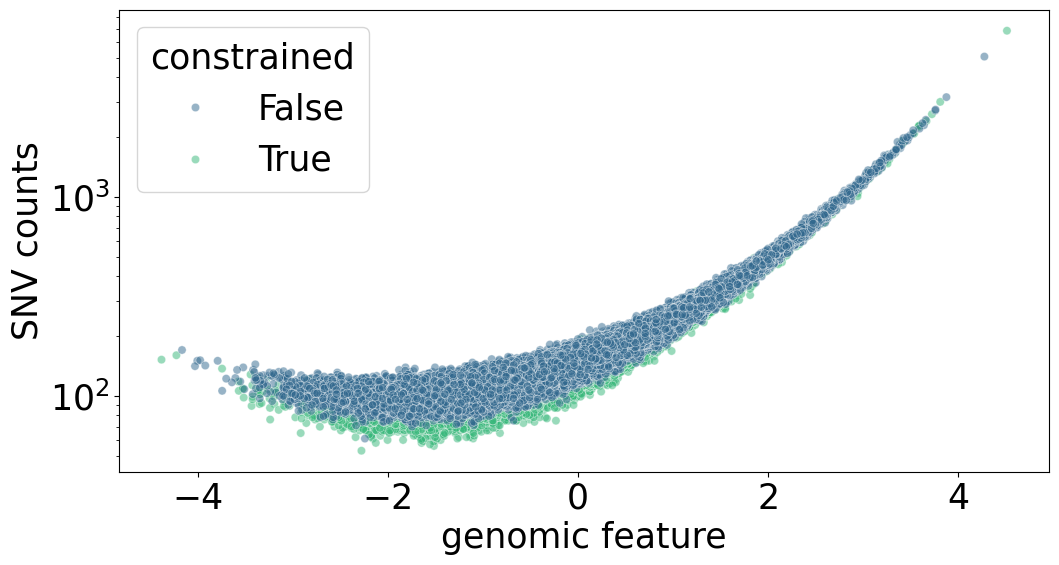

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



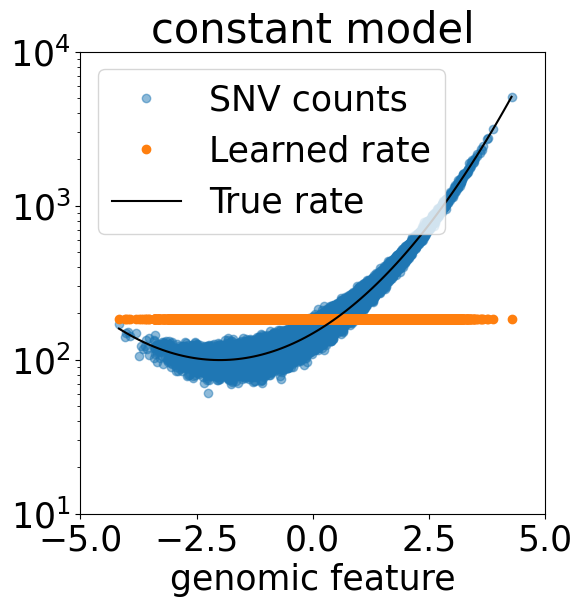

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



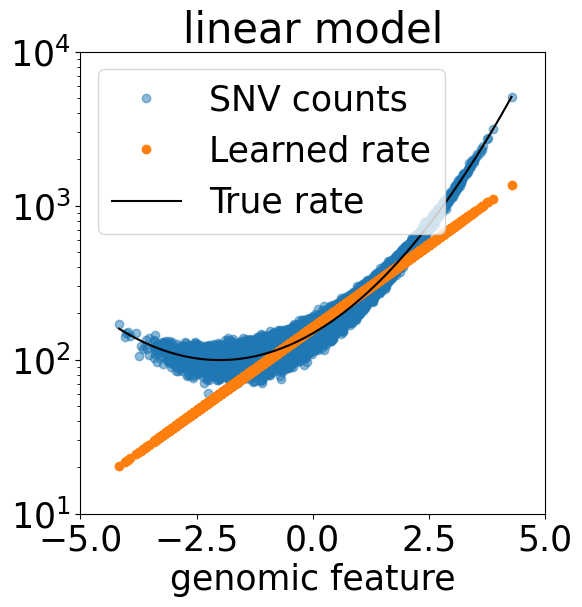

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



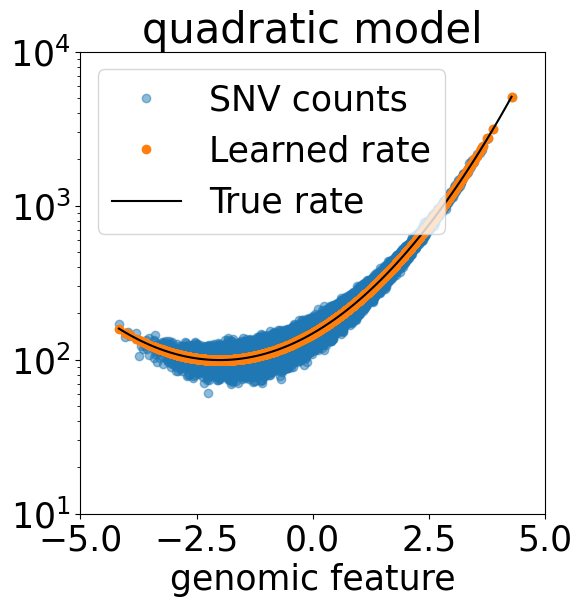

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,2.216228,581,True,183.217014,-397.782986,-29.387545,487.845772,-93.154228,-4.217560,4.911665,588.682299,7.682299,0.316629
1,0.332420,145,True,183.217014,38.217014,2.823409,190.960722,45.960722,3.325943,0.110503,171.353013,26.353013,2.013188
2,-1.074199,96,True,183.217014,87.217014,6.443448,94.795757,-1.204243,-0.123686,1.153903,108.291680,12.291680,1.181174
3,0.919696,226,True,183.217014,-42.782986,-3.160736,255.818340,29.818340,1.864308,0.845841,233.309479,7.309479,0.478542
4,0.269298,172,True,183.217014,11.217014,0.828694,185.052542,13.052542,0.959506,0.072521,166.443515,-5.556485,-0.430692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.759186,125,False,183.217014,58.217014,4.300976,110.893100,-14.106900,-1.339613,0.576363,115.957820,-9.042180,-0.839698
99996,-0.922945,102,False,183.217014,81.217014,6.000178,102.210282,0.210282,0.020800,0.851828,111.630448,9.630448,0.911497
99997,-0.827208,97,False,183.217014,86.217014,6.369569,107.200324,10.200324,0.985181,0.684273,114.066056,17.066056,1.597920
99998,1.374434,333,False,183.217014,-149.782986,-11.065718,320.819221,-12.180779,-0.680056,1.889070,310.664914,-22.335086,-1.267189


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

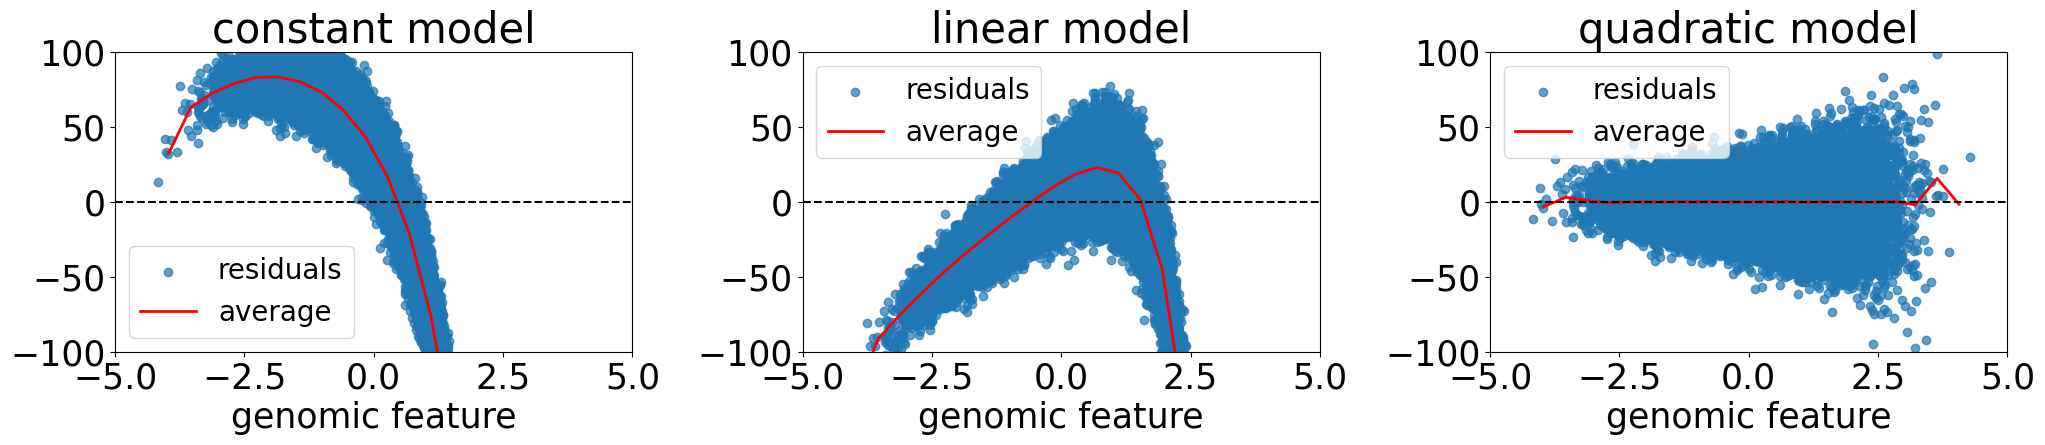

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

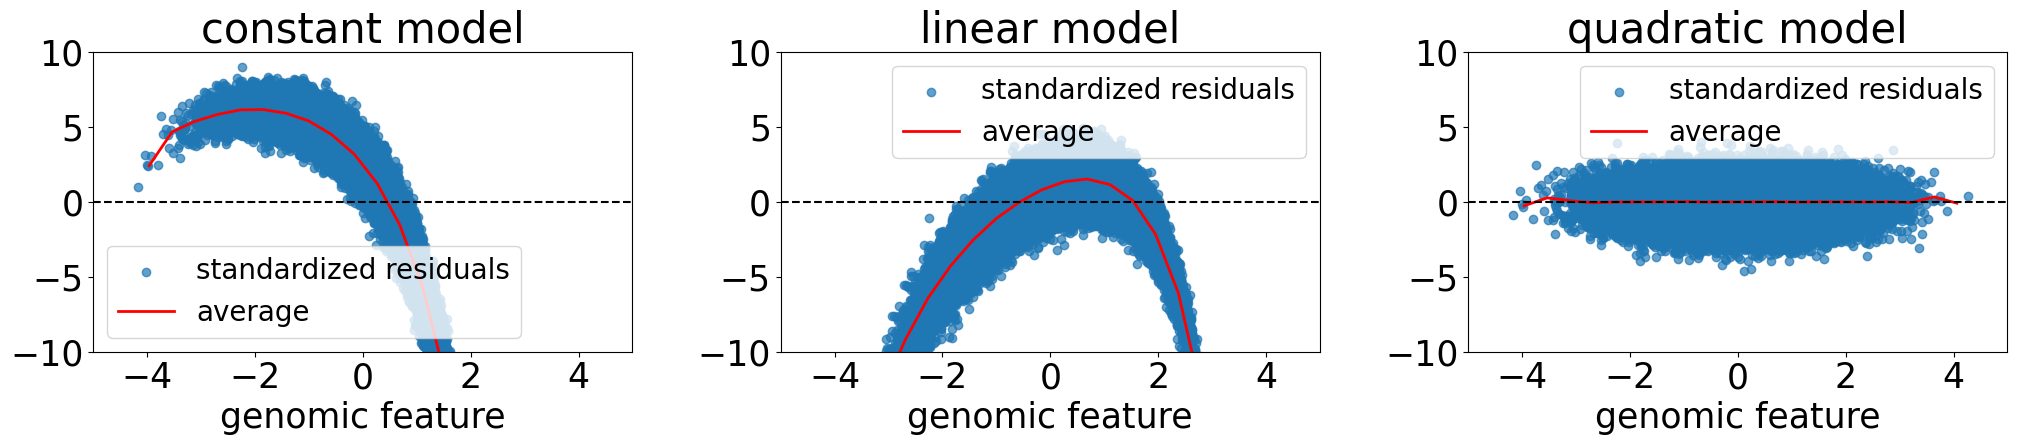

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 25})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES)

## Stratify neutral models' performances by x

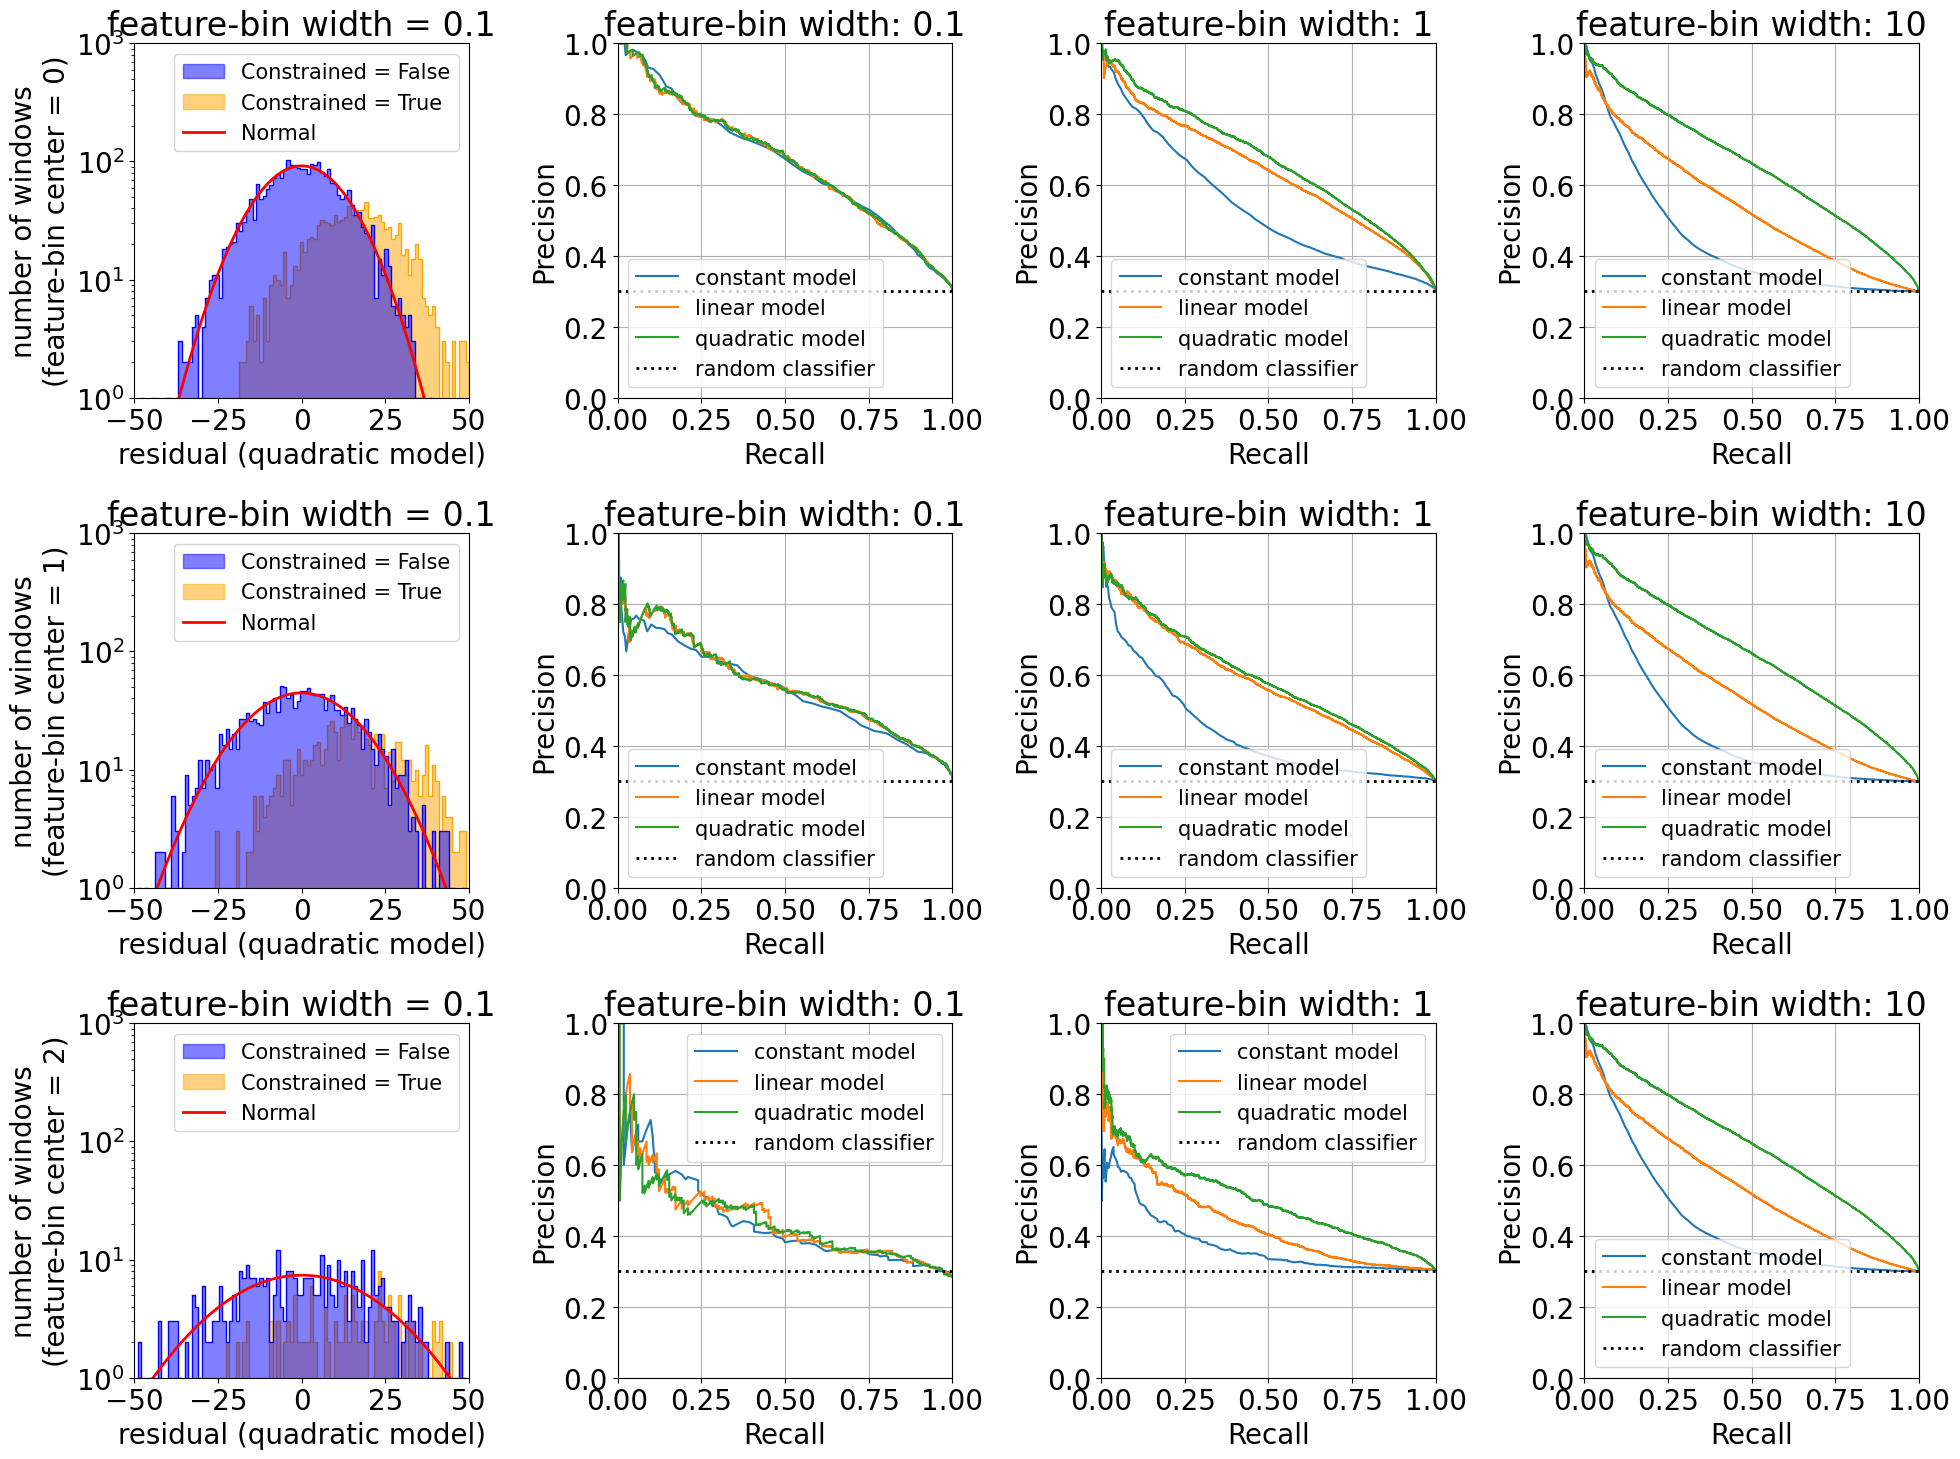

In [6]:
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION)

## Model bias is responsible for poor genome-wide performance 

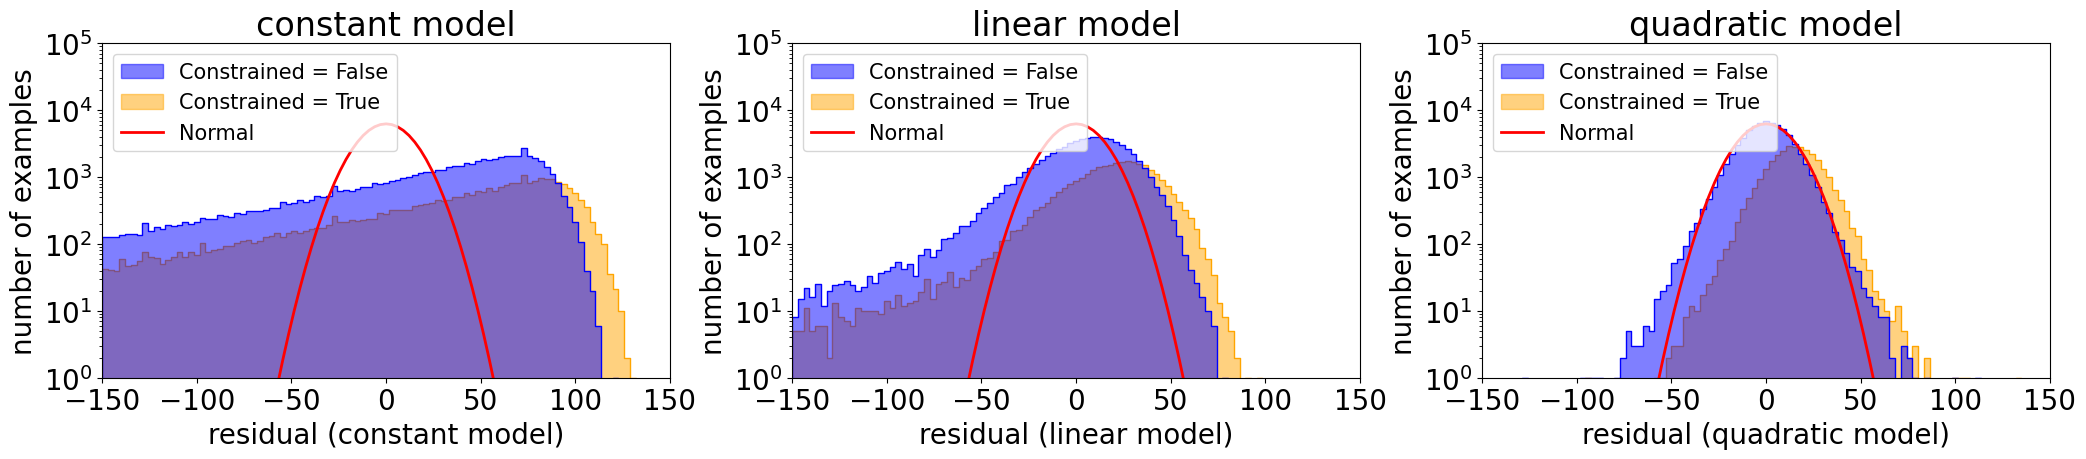

In [7]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

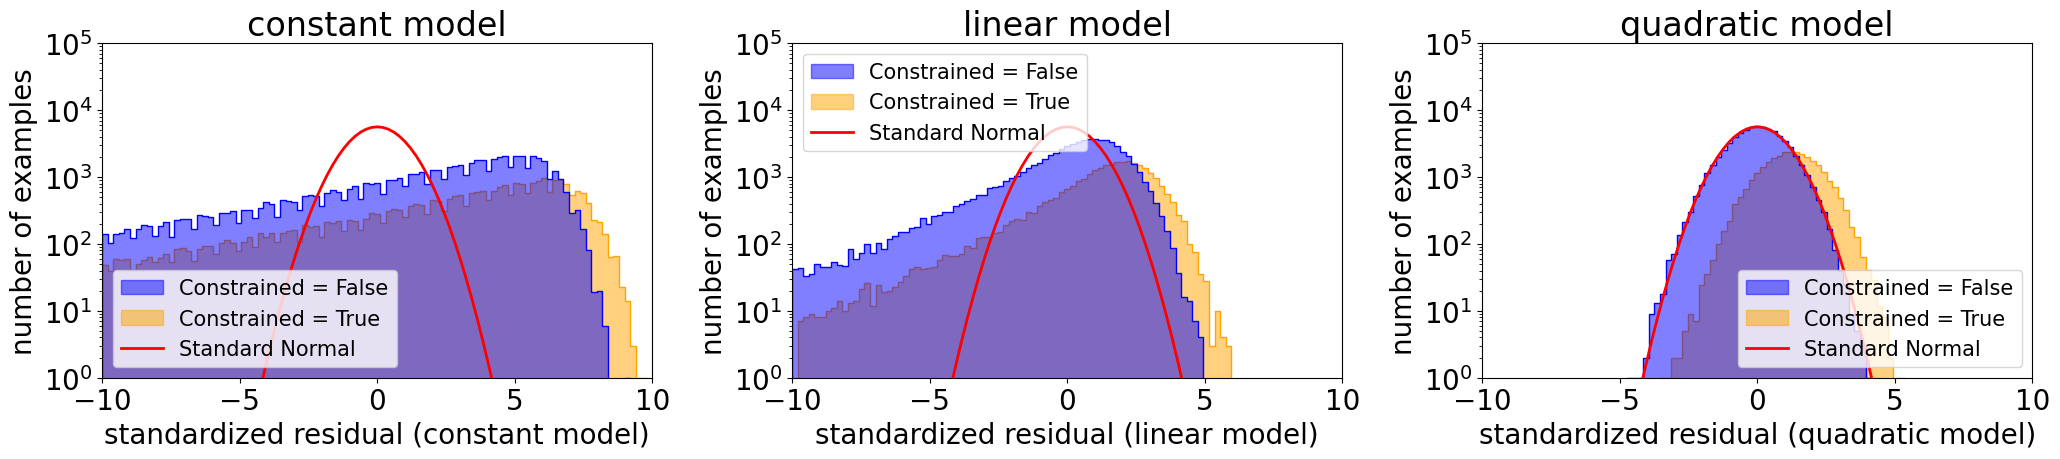

In [8]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


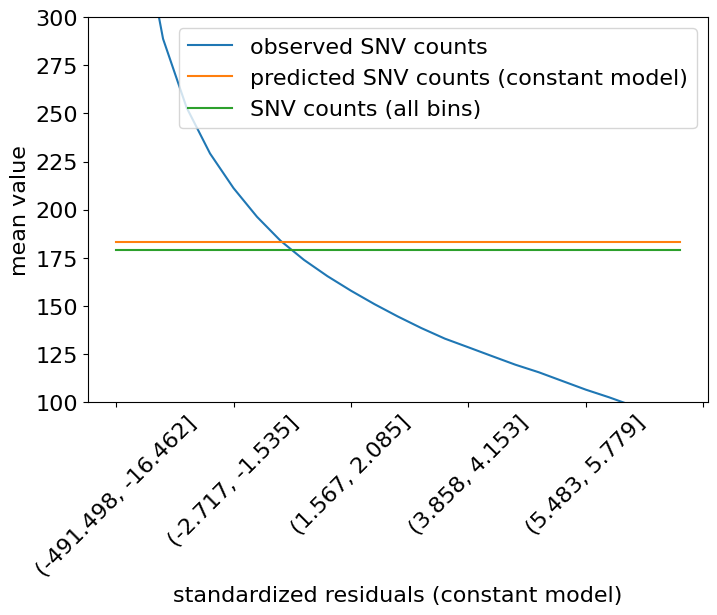

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


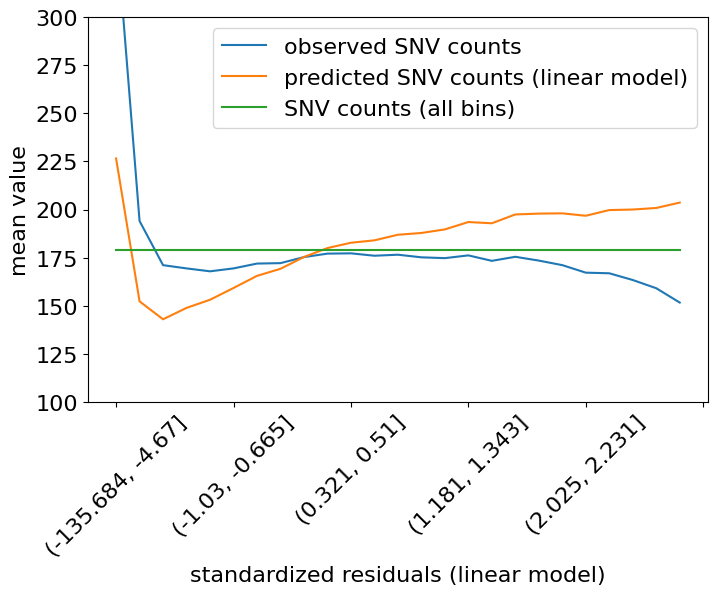

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


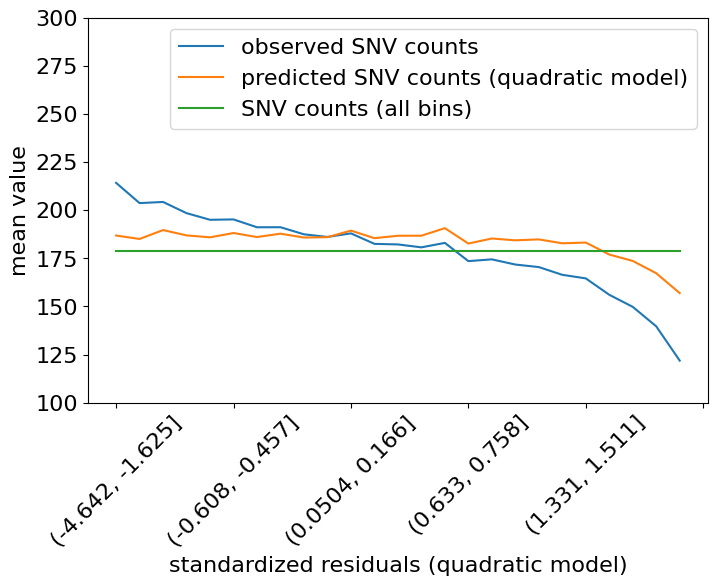

In [9]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

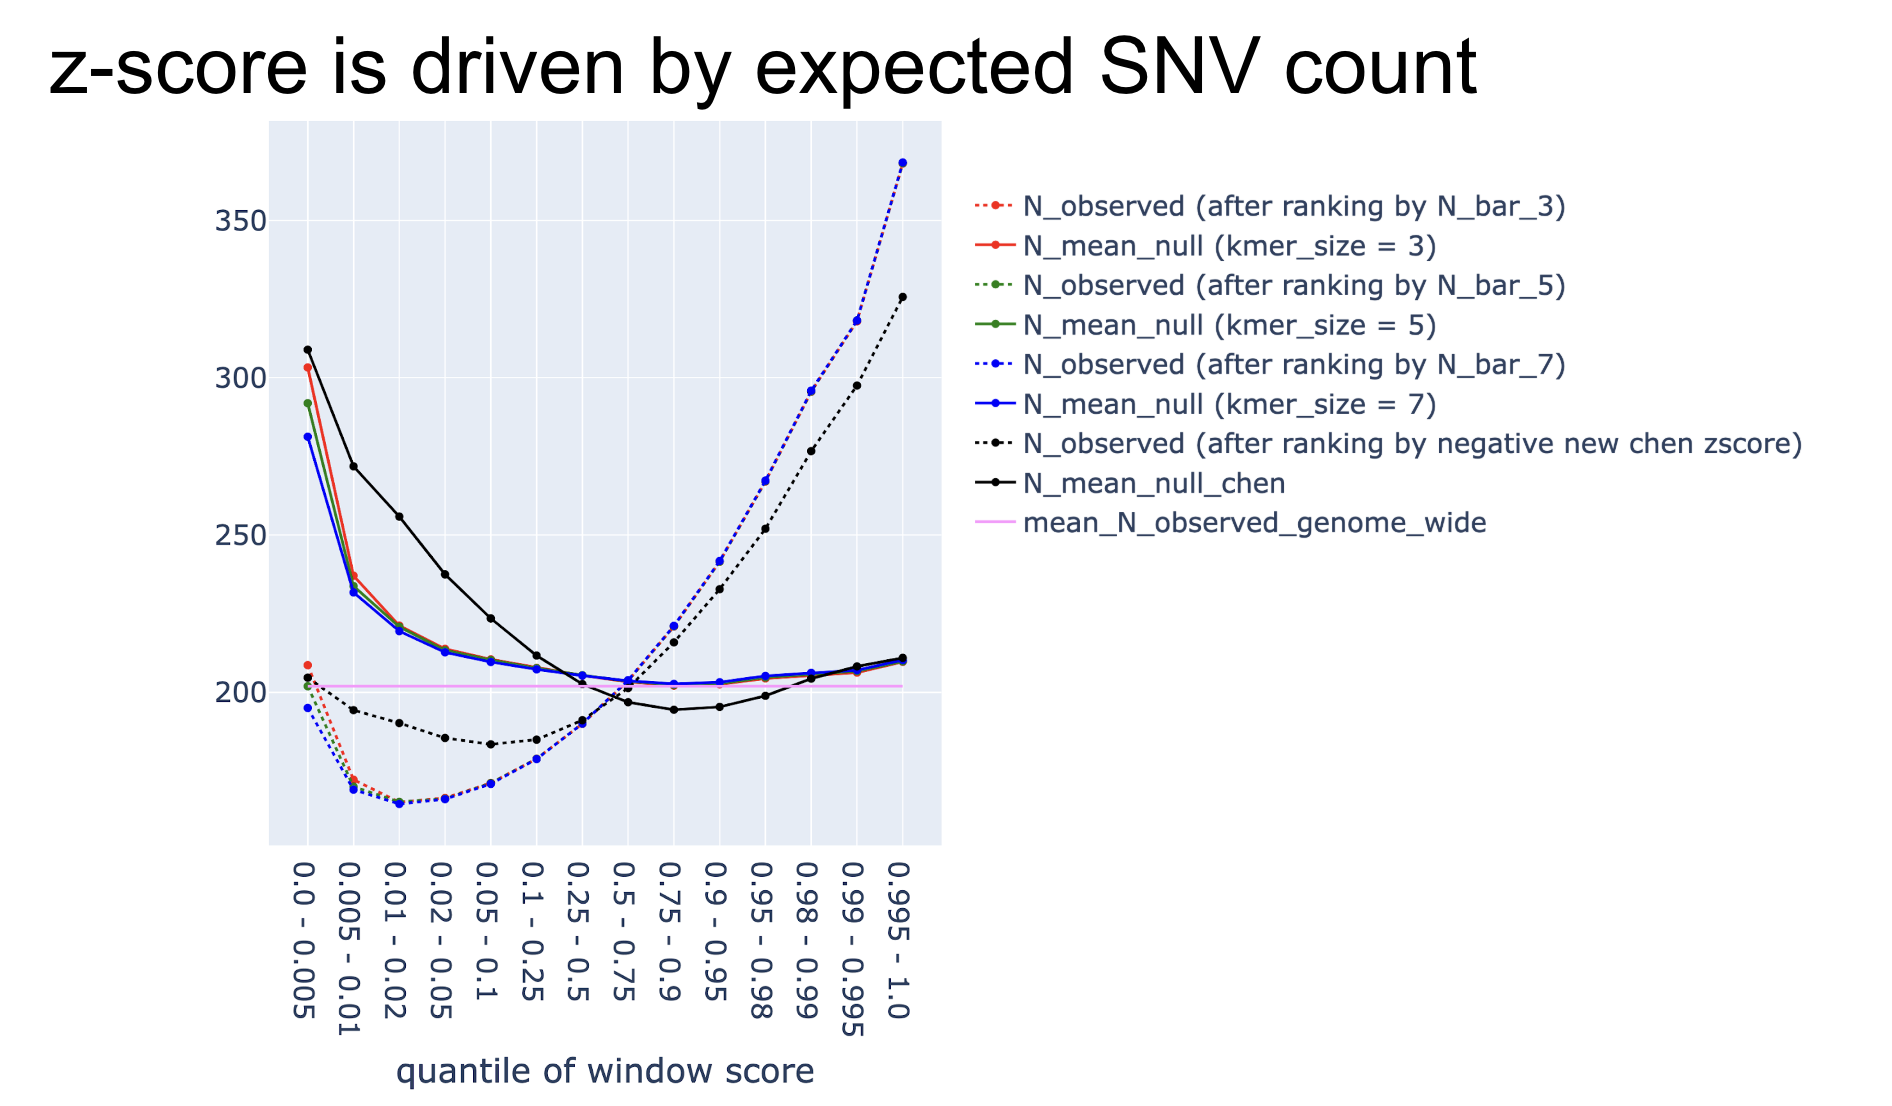

In [10]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)